In [71]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [72]:
df=pd.read_csv("product-demand.csv")

In [73]:
df.shape

(150150, 9)

In [74]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [76]:
df[df['total_price'].isnull()]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


In [77]:
df['total_price']=df['total_price'].fillna(df['total_price'].mean())

In [78]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308172,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [79]:
df[['day','month','year']]=df['week'].str.split('/',expand=True)

In [80]:
df.drop("week",axis=1,inplace=True);
df.head()


,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11


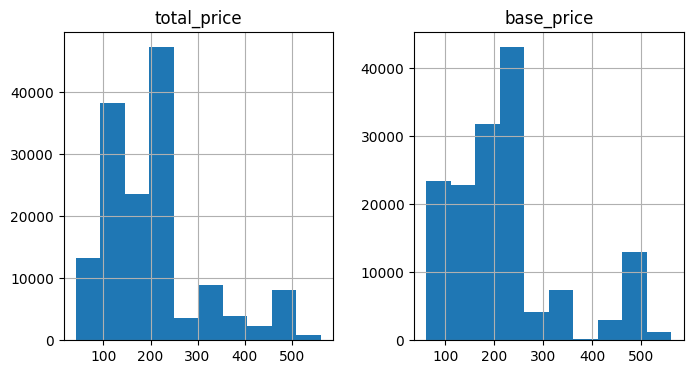

In [81]:
df[['total_price','base_price']].hist(figsize=(8,4))
plt.show()


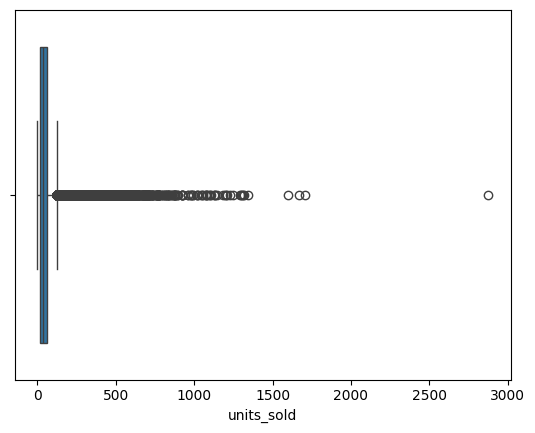

<Axes: xlabel='store_id', ylabel='units_sold'>

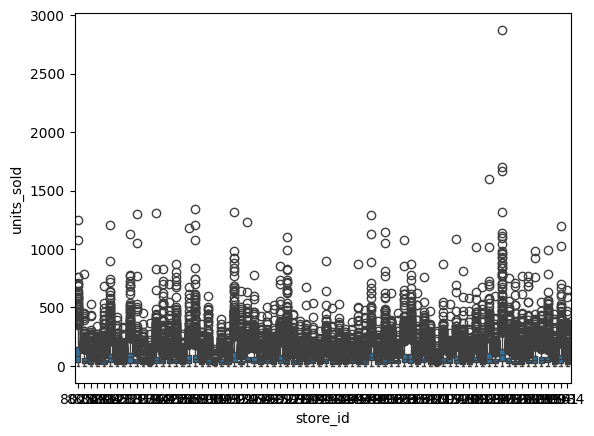

In [82]:
sns.boxplot(x=df['units_sold'])
plt.show()
sns.boxplot(x='store_id', y='units_sold', data=df)

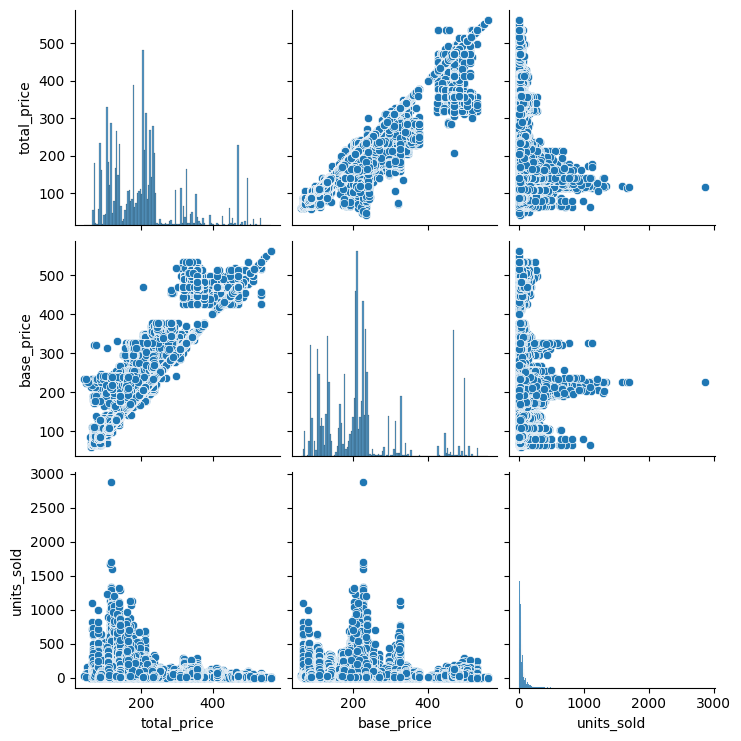

In [83]:
sns.pairplot(df[['total_price','base_price','units_sold']])
plt.show()



In [84]:
X = df.drop('units_sold', axis=1)
y = df['units_sold']

In [85]:
df[['day','month','year']] = df[['day','month','year']].astype(int)
df = df.sort_values(['year','month','day'])

X = df.drop('units_sold', axis=1)
y = df['units_sold']

split = int(0.8 * len(df))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


<Axes: >

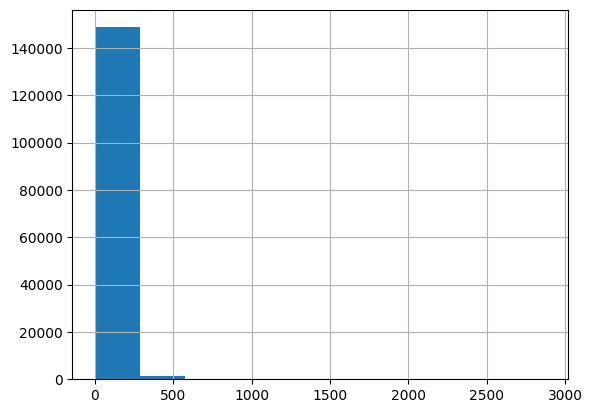

In [86]:
df['units_sold'].hist()

In [87]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
cat_features = ['store_id', 'sku_id', 'is_featured_sku', 'is_display_sku']

model1 = CatBoostRegressor(
    iterations=300,
    learning_rate=0.1,
    depth=8,
    cat_features=cat_features,
    loss_function='RMSE',
    verbose=False
)
model2=RandomForestRegressor(n_jobs=-1)#by setting n_jobs=-1 it uses all the cores of the cpu
model5=GradientBoostingRegressor()

In [90]:
model5.fit(X_train,y_train)

GradientBoostingRegressor()

In [91]:
model2.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [92]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [93]:
from sklearn.metrics import pair_confusion_matrix,r2_score,mean_squared_error,mean_absolute_error

In [94]:
pred1=model1.predict(X_test)


In [95]:
pred2=model2.predict(X_test)

In [96]:
pred5=model5.predict(X_test)

In [97]:
rmse1= np.sqrt(mean_squared_error(y_test,pred1))
rmse2= np.sqrt(mean_squared_error(y_test,pred2))
rmse5= np.sqrt(mean_squared_error(y_test,pred5))
print("RMSE for CatBoostRegressor:",rmse1)
print("RMSE for RandomForestRegressor:",rmse2)
print("RMSE for GradientBoostingRegressor:",rmse5)

RMSE for CatBoostRegressor: 21.683656900091115
RMSE for RandomForestRegressor: 27.257910441466926
RMSE for GradientBoostingRegressor: 35.54084202004539


In [98]:
r2_score1=r2_score(y_test,pred1)
r2_score2=r2_score(y_test,pred2)
r2_score5=r2_score(y_test,pred5)

In [99]:
print("R2 Score for CatBoostRegressor:",r2_score1)
print("R2 Score for RandomForestRegressor:",r2_score2)
print("R2 Score for GradientBoostingRegressor:",r2_score5)



R2 Score for CatBoostRegressor: 0.8567013417285393
R2 Score for RandomForestRegressor: 0.7735552840498867
R2 Score for GradientBoostingRegressor: 0.6150250281993703


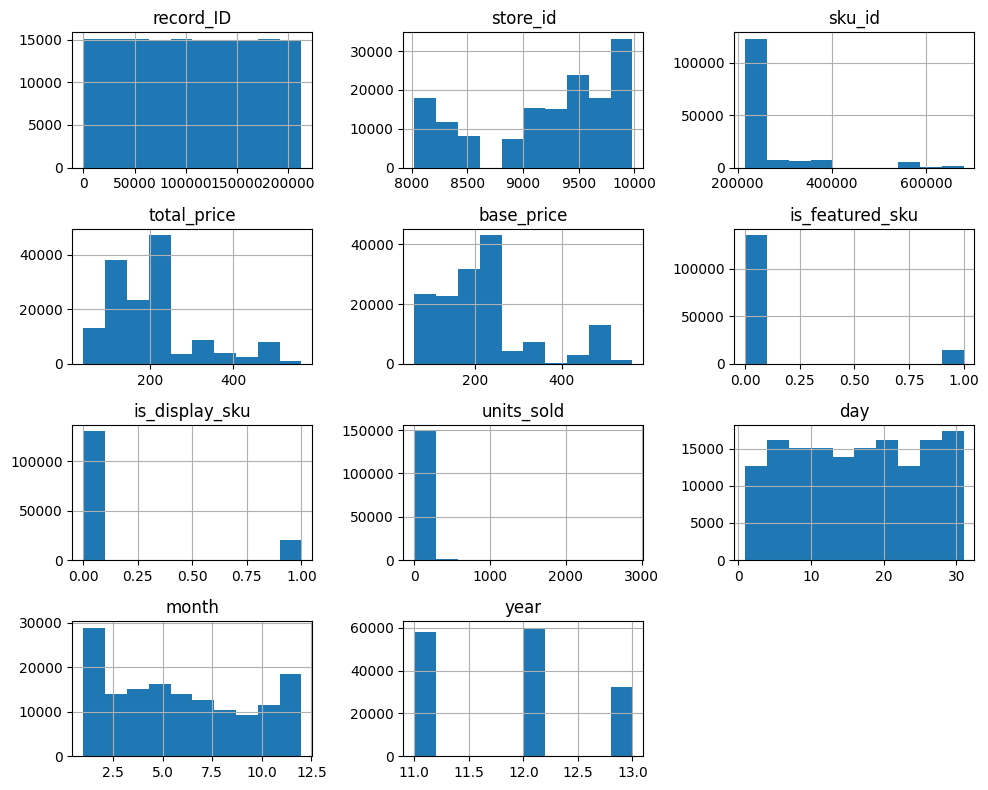

In [100]:
df.hist(figsize=(10,8))
plt.tight_layout()#ot automatically fixes spacing issues in your plots.
plt.show()

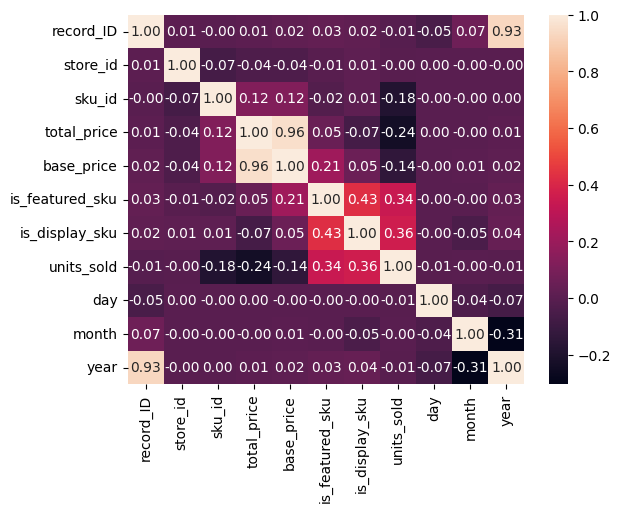

In [101]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")# annot=True to display correlation values on the heatmap
plt.show()#fmt=".2f" to format the numbers to 2 decimal places

In [102]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
model3=AdaBoostRegressor(n_estimators=100,random_state=42)
model4=RandomForestRegressor(n_jobs=-1)
estimators=[('catboost', model1), ('random_forest', model2), ('ada_boost', model3),('gradient_boosting',model5)]
stacking_regressor=StackingRegressor(estimators=estimators,final_estimator=model4)
stacking_regressor.fit(X_train,y_train)
pred_stack=stacking_regressor.predict(X_test)
rmse_stack= np.sqrt(mean_squared_error(y_test,pred_stack))
print("RMSE for Stacking Regressor:",rmse_stack)  
r2_score_stack=r2_score(y_test,pred_stack)  
print("R2 Score for Stacking Regressor:",r2_score_stack)

RMSE for Stacking Regressor: 21.19103368498169
R2 Score for Stacking Regressor: 0.8631384815650797


In [103]:
dict1={'Model':['CatBoostRegressor','RandomForestRegressor','StackingRegressor','GradientBoostingRegressor'],
       'RMSE':[rmse1,rmse2,rmse_stack,rmse5],
       'R2_Score':[r2_score1,r2_score2,r2_score_stack,r2_score5]
       }
results_df=pd.DataFrame(dict1)


In [104]:
results_df

,Model,RMSE,R2_Score
0,CatBoostRegressor,21.683657,0.856701
1,RandomForestRegressor,27.257910,0.773555
2,StackingRegressor,21.191034,0.863138
3,GradientBoostingRegressor,35.540842,0.615025


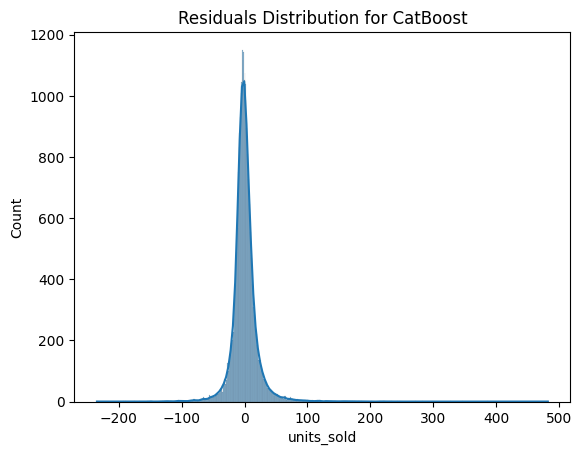

In [111]:
residuals = y_test - pred1
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution for CatBoost')
plt.show()


Text(0.5, 1.0, 'Residuals Distribution for Random Forest')

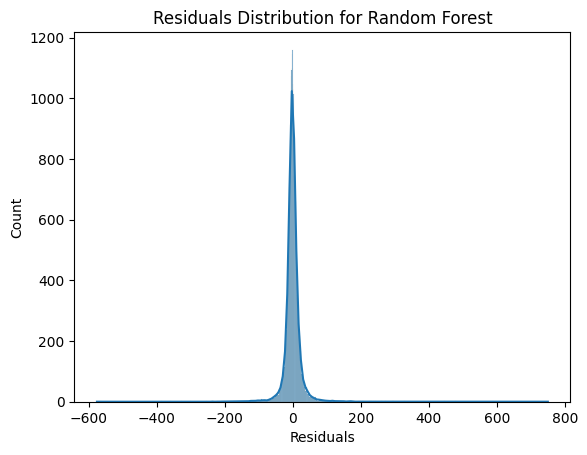

In [106]:
residuals2=y_test-pred2
sns.histplot(residuals2,kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution for Random Forest')

Text(0.5, 1.0, 'Residuals Distribution for Gradient Boosting')

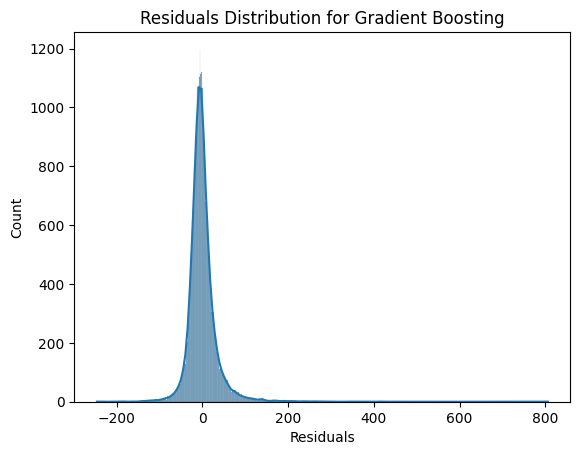

In [107]:
residuals3=y_test-pred5
sns.histplot(residuals3,kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution for Gradient Boosting')   

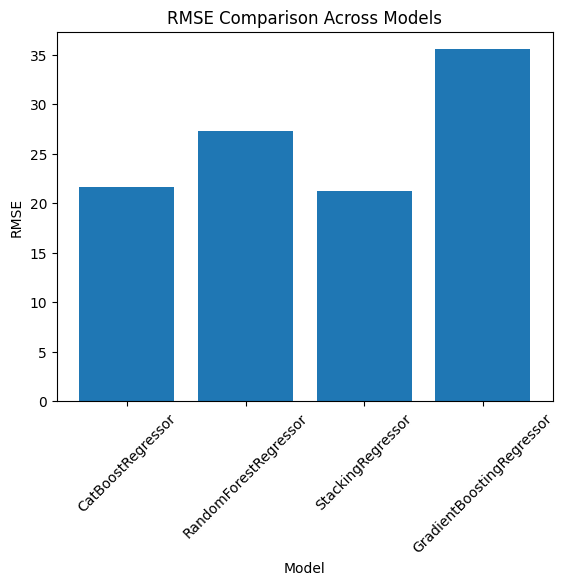

In [108]:
plt.bar(results_df['Model'], results_df['RMSE'])
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison Across Models')
plt.show()

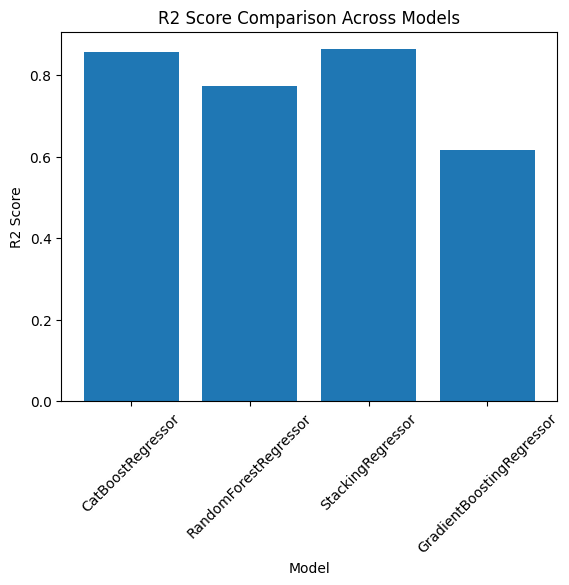

In [109]:
plt.bar(results_df['Model'],results_df['R2_Score'])
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison Across Models')
plt.show()